In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import datetime
df = pd.ExcelFile (r'C:\Users\Kit\Downloads\commodity_data.xlsx')
print (df)

In [2]:
df.sheet_names

['premiums', 'other', 'china', 's&d', 'arb', 'target']

In [3]:
target = df.parse(sheet_name='target').dropna(axis=1, how='all')
target.set_index('date',inplace=True)
#target = target.resample('B').ffill()
target

,target
date,
2013-01-04,0
2013-01-11,0
2013-01-18,0
2013-01-25,0
2013-02-01,0
2013-02-08,0
2013-02-15,0
2013-02-22,0
2013-03-01,0


In [4]:
premium = df.parse(sheet_name='premiums').dropna(axis=1, how='all')
premium = premium.iloc[::-1]

premium_1 = premium.iloc[:, 0:2] 
premium_1 = premium_1.set_index(premium_1['date'].dt.date)
premium_1 = premium_1.drop('date',axis=1).dropna()
premium_1.index = pd.to_datetime(premium_1.index)
premium_1 = premium_1.loc[target.index[0]:target.index[-1]]
premium_1 = premium_1.resample('W-Fri').ffill()

premium_2 = premium.iloc[:, 2:4] 
premium_2 = premium_2.set_index(premium_2['date.1'].dt.date)
premium_2 = premium_2.drop('date.1',axis=1).dropna()
premium_2.index = pd.to_datetime(premium_2.index)
premium_2 = premium_2.loc[target.index[0]:target.index[-1]]
premium_2 = premium_2.resample('W-Fri').ffill()

premium_3 = premium.iloc[:, 4:] 
premium_3 = premium_3.set_index(premium_3['date.2'].dt.date)
premium_3 = premium_3.drop('date.2',axis=1).dropna()
premium_3.index = pd.to_datetime(premium_3.index)
premium_3 = premium_3.loc[target.index[0]:target.index[-1]]
premium_3 = premium_3.resample('W-Fri').ffill()

premiums are weekly

In [5]:
other = df.parse(sheet_name='other').dropna(axis=1, how='all')
other = other.iloc[::-1]

price = other.iloc[:,0:2]
price = price.set_index('Dates')
price = price.loc[target.index[0]:target.index[-1]]
price = price.resample('W-Fri').ffill()

spread = other.iloc[:,2:4]
spread = spread.set_index('Dates.1').dropna()
spread = spread.loc[target.index[0]:target.index[-1]]
spread = spread.resample('W-Fri').ffill()

liquidity = other.iloc[:,4:6]
liquidity = liquidity.set_index('Dates.2').dropna()
liquidity = liquidity.loc[target.index[0]:target.index[-1]]
liquidity = liquidity.resample('W-Fri').ffill()

shfe_inv = other.iloc[:,6:8]
shfe_inv = shfe_inv.set_index('Dates.3').dropna()
shfe_inv = shfe_inv.loc[target.index[0]:target.index[-1]]
shfe_inv = shfe_inv.resample('W-Fri').ffill()

currency = other.iloc[:,8:]
currency = currency.set_index('Dates.4').dropna()
currency = currency.loc[target.index[0]:target.index[-1]]
currency = currency.resample('W-Fri').ffill()


Liquidity/shfe_inv/ are weekly

currency/spread/price are daily

In [6]:
china = df.parse(sheet_name='china').dropna(axis=1, how='all')
china = china.iloc[::-1]
china = china.set_index('Date')
china = china.loc[target.index[0]:target.index[-1]]
china = china.resample('W-Fri').ffill()
china

,treatment,ref_profit,inv_tot,inv_sgt,inv_bond
Date,,,,,
2013-01-04,5000.0,4991.779557,NaN,NaN,NaN
2013-01-11,5000.0,4992.146661,NaN,49.73,NaN
2013-01-18,5050.0,5047.858707,NaN,49.39,NaN
2013-01-25,5050.0,5048.449222,NaN,50.33,NaN
2013-02-01,5050.0,5048.000299,NaN,NaN,NaN
2013-02-08,5050.0,5047.858318,NaN,NaN,NaN
2013-02-15,5050.0,5047.858318,NaN,NaN,NaN
2013-02-22,5100.0,5098.517815,NaN,NaN,NaN
2013-03-01,5100.0,5091.794516,NaN,NaN,NaN


In [7]:
sandd = df.parse(sheet_name='s&d').dropna(axis=1, how='all')
sandd = sandd.iloc[::-1]
sandd = sandd.set_index('Date')
sandd = sandd.loc[target.index[0]:target.index[-1]]
sandd = sandd.resample('W-Fri').ffill()
sandd

,conc_demand,conc_bal,ref_demand,ref_bal
Date,,,,
2013-02-01,39.441124,-8.028693,36.546430,3.101009
2013-02-08,39.441124,-8.028693,36.546430,3.101009
2013-02-15,39.441124,-8.028693,36.546430,3.101009
2013-02-22,39.441124,-8.028693,36.546430,3.101009
2013-03-01,38.679053,3.999263,54.762489,-10.125184
2013-03-08,38.679053,3.999263,54.762489,-10.125184
2013-03-15,38.679053,3.999263,54.762489,-10.125184
2013-03-22,38.679053,3.999263,54.762489,-10.125184
2013-03-29,38.679053,3.999263,54.762489,-10.125184


In [8]:
arb = df.parse(sheet_name='arb').dropna(axis=1, how='all')
arb = arb.iloc[::-1]
arb = arb.set_index(arb['date'].dt.date)
arb = arb.drop('date',axis=1).dropna()
arb.index = pd.to_datetime(arb.index)
arb = arb.groupby(arb.index).mean()

arb = arb.loc[target.index[0]:target.index[-1]]
arb = arb.resample('W-Fri').ffill()
arb

,arb
date,
2013-01-04,-121.433877
2013-01-11,-98.970682
2013-01-18,-96.063238
2013-01-25,-153.387039
2013-02-01,-144.974331
2013-02-08,-176.094446
2013-02-15,-176.094446
2013-02-22,-157.340790
2013-03-01,-115.818602


In [9]:
df = pd.concat([target,premium_1,premium_2,premium_3,
          price,spread,liquidity,shfe_inv,currency,china,
               sandd,arb],axis=1)
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,ref_profit,inv_tot,inv_sgt,inv_bond,conc_demand,conc_bal,ref_demand,ref_bal,arb
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.0,4991.779557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121.433877
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.0,4992.146661,NaN,49.73,NaN,NaN,NaN,NaN,NaN,-98.970682
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.0,5047.858707,NaN,49.39,NaN,NaN,NaN,NaN,NaN,-96.063238
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.0,5048.449222,NaN,50.33,NaN,NaN,NaN,NaN,NaN,-153.387039
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.0,5048.000299,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-144.974331
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.0,5047.858318,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.0,5047.858318,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.0,5098.517815,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-157.340790
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.0,5091.794516,NaN,NaN,NaN,38.679053,3.999263,54.762489,-10.125184,-115.818602
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.0,5098.189484,NaN,NaN,NaN,38.679053,3.999263,54.762489,-10.125184,-69.861285


In [10]:
df.isna().sum().sort_values(ascending=False)

inv_bond       169
inv_sgt        123
inv_tot        112
treatment       85
ref_profit      21
ref_bal         11
ref_demand       7
conc_bal         7
conc_demand      7
price            0
premium_1        0
premium_2        0
premium_3        0
arb              0
spread           0
liquidity        0
shfe_inv         0
currency         0
target           0
dtype: int64

In [11]:
df.describe()

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,ref_profit,inv_tot,inv_sgt,inv_bond,conc_demand,conc_bal,ref_demand,ref_bal,arb
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,332.000000,396.000000,305.000000,294.000000,248.000000,410.000000,410.000000,410.000000,406.000000,417.000000
mean,0.604317,128.046763,128.864508,144.474820,2328.709832,3.769688,-0.134462,146891.100719,1.180513,4955.496988,3999.084991,13.062492,20.958435,10.172419,45.930569,-2.283439,50.298375,-0.998299,-66.071930
std,0.489584,20.395302,34.236946,35.512524,440.290867,31.283825,0.651158,81869.677722,0.095669,903.504160,2116.955649,6.234693,9.742553,4.926670,3.187311,6.028231,6.321717,4.453528,85.337374
min,0.000000,70.000000,80.000000,77.000000,1469.000000,-36.750000,-1.273475,18580.000000,1.045100,3400.000000,-9.922456,2.500000,8.700000,2.300000,36.957682,-21.995552,28.936146,-10.125184,-338.029581
25%,0.000000,120.000000,102.500000,119.000000,1993.000000,-12.250000,-0.563195,74258.000000,1.112100,4050.000000,3499.302797,8.500000,13.035000,7.402500,43.807731,-6.362207,47.483475,-3.283871,-125.899285
50%,1.000000,135.000000,125.000000,140.000000,2263.000000,-3.750000,-0.226809,149028.000000,1.140100,5100.000000,4896.305965,11.000000,17.905000,9.000000,45.769386,-2.306527,51.053192,-1.932375,-67.294198
75%,1.000000,140.000000,150.000000,170.000000,2607.000000,7.000000,0.181035,205573.000000,1.235300,5400.000000,5344.981226,16.000000,28.677500,12.200000,48.209537,2.462598,54.455340,0.791139,-8.313282
max,1.000000,167.500000,290.000000,293.000000,3559.000000,163.000000,2.647426,327881.000000,1.391400,6500.000000,6496.855990,34.000000,50.330000,26.500000,53.233919,10.783843,64.042640,17.751323,362.331501


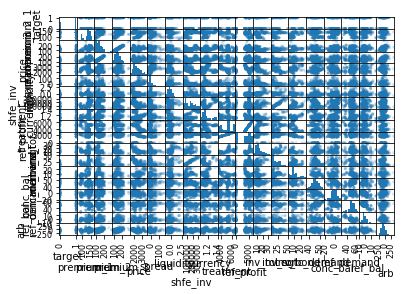

In [12]:
pd.plotting.scatter_matrix(df,alpha=0.2)
plt.show()

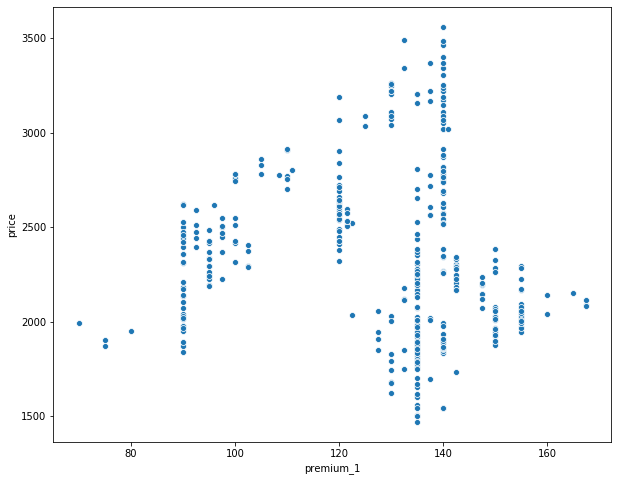

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['premium_1'],df['price'])

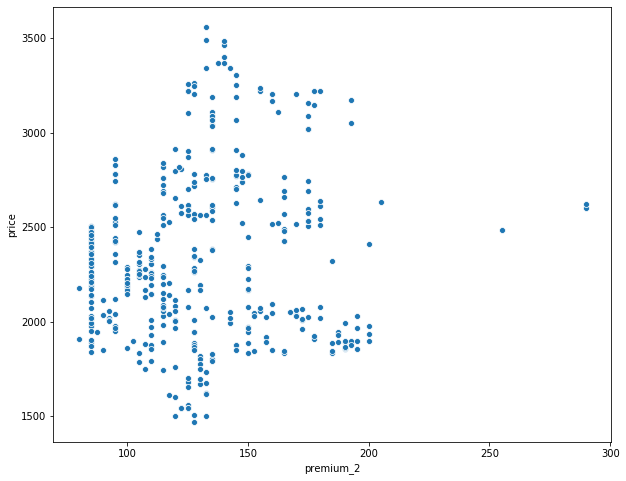

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['premium_2'],df['price'])


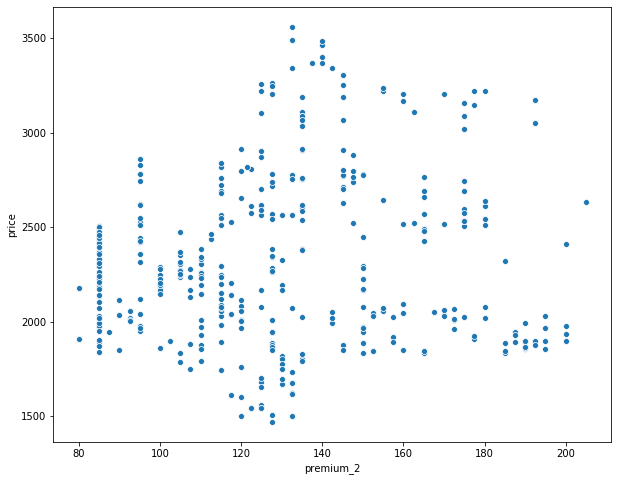

In [15]:
df = df.drop(df[df['premium_2']>250].index)
plt.figure(figsize=(10,8))
sns.scatterplot(df['premium_2'],df['price'])


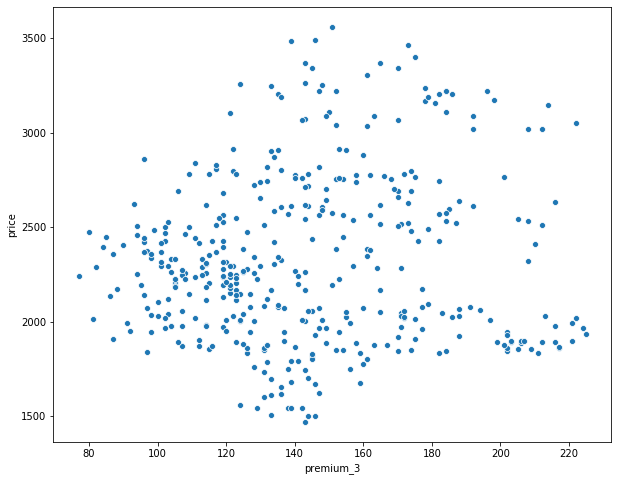

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['premium_3'],df['price'])

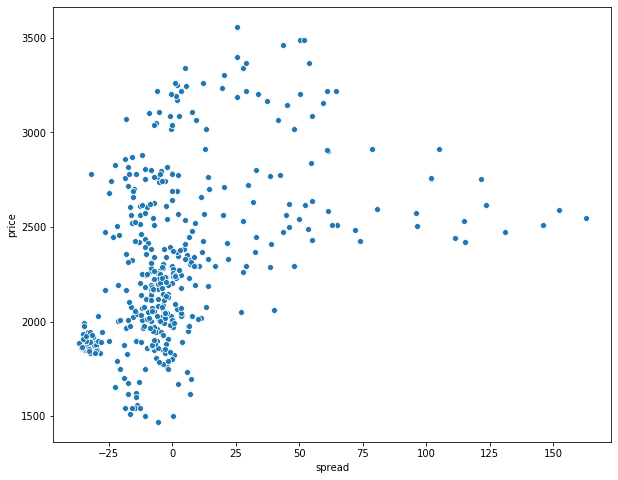

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['spread'],df['price'])

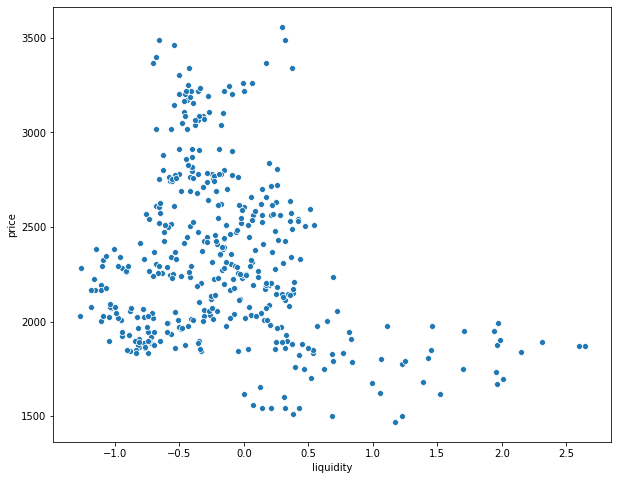

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['liquidity'],df['price'])

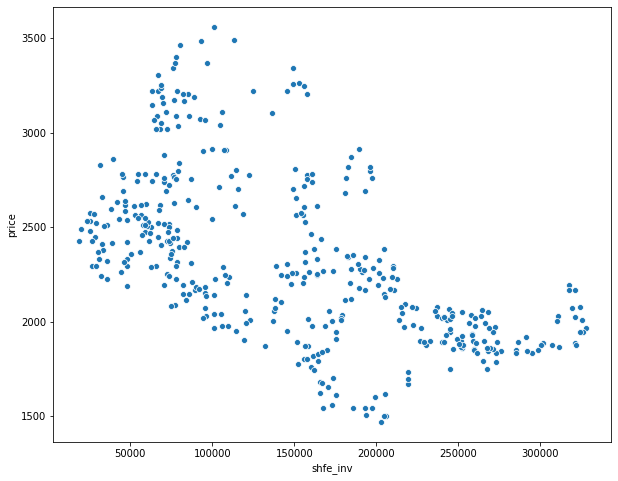

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['shfe_inv'],df['price'])

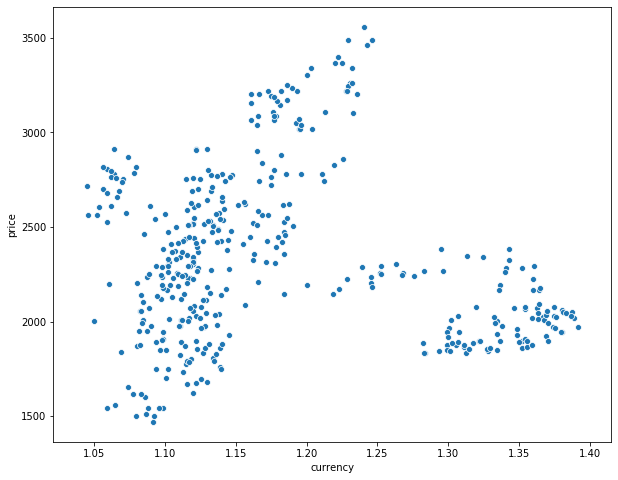

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['currency'],df['price'])

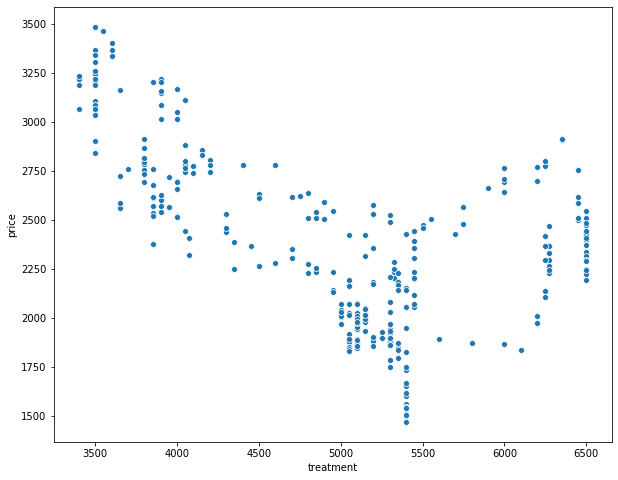

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['treatment'],df['price'])

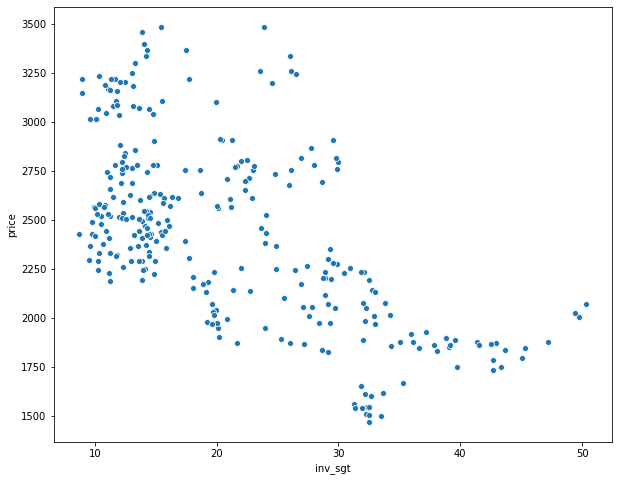

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['inv_sgt'],df['price'])

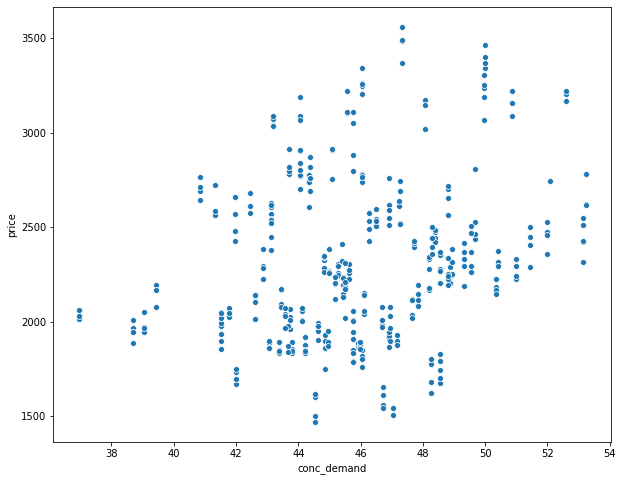

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['conc_demand'],df['price'])

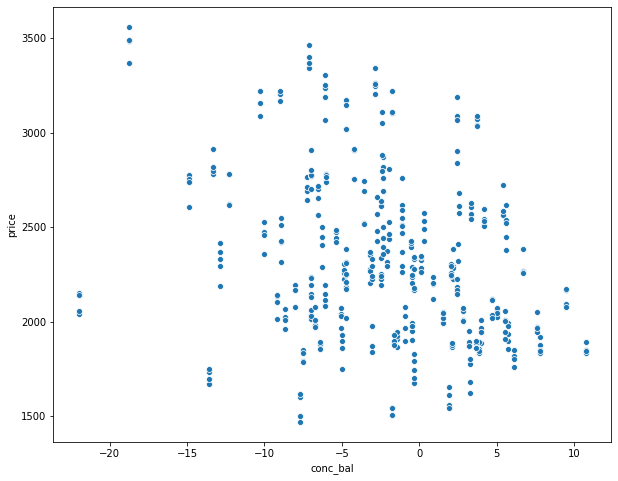

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['conc_bal'],df['price'])

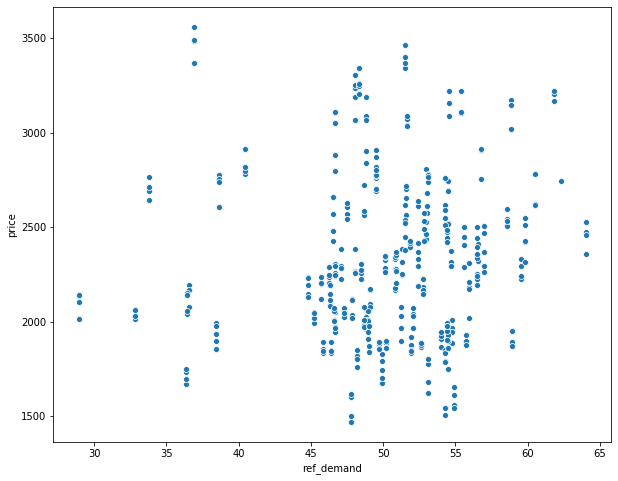

In [25]:

plt.figure(figsize=(10,8))
sns.scatterplot(df['ref_demand'],df['price'])

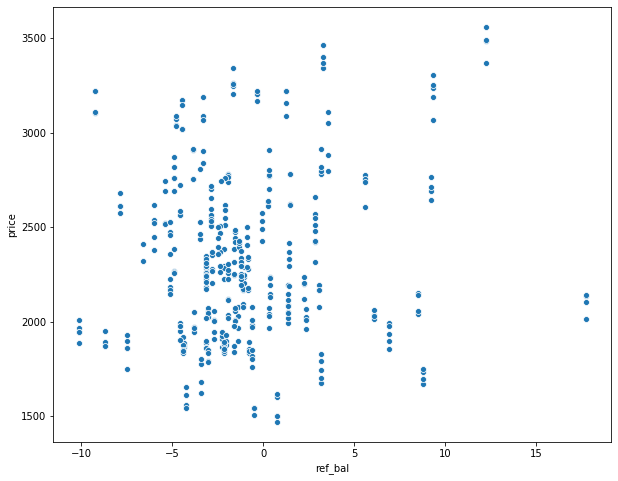

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['ref_bal'],df['price'])

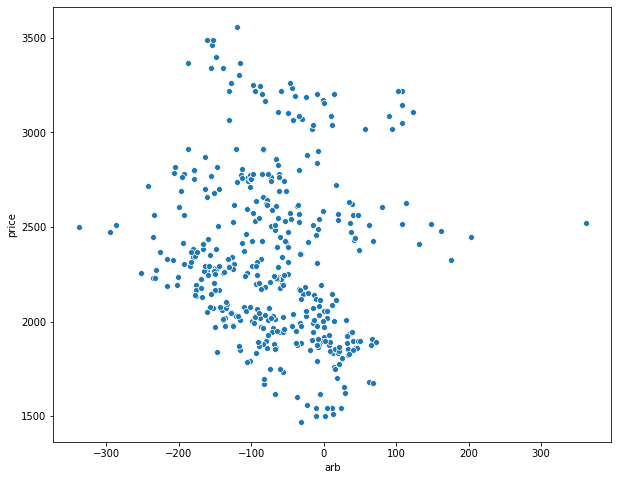

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(df['arb'],df['price'])


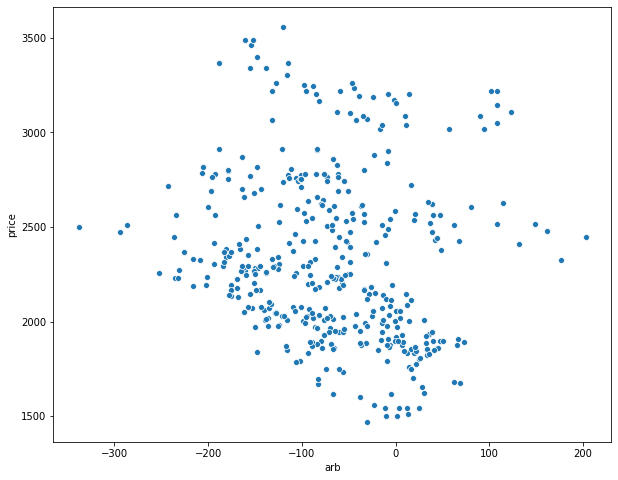

In [28]:
df = df.drop(df[df['arb']>300].index)
plt.figure(figsize=(10,8))
sns.scatterplot(df['arb'],df['price'])


In [29]:
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,ref_profit,inv_tot,inv_sgt,inv_bond,conc_demand,conc_bal,ref_demand,ref_bal,arb
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.0,4991.779557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121.433877
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.0,4992.146661,NaN,49.73,NaN,NaN,NaN,NaN,NaN,-98.970682
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.0,5047.858707,NaN,49.39,NaN,NaN,NaN,NaN,NaN,-96.063238
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.0,5048.449222,NaN,50.33,NaN,NaN,NaN,NaN,NaN,-153.387039
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.0,5048.000299,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-144.974331
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.0,5047.858318,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.0,5047.858318,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.0,5098.517815,NaN,NaN,NaN,39.441124,-8.028693,36.546430,3.101009,-157.340790
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.0,5091.794516,NaN,NaN,NaN,38.679053,3.999263,54.762489,-10.125184,-115.818602
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.0,5098.189484,NaN,NaN,NaN,38.679053,3.999263,54.762489,-10.125184,-69.861285


In [30]:
for col in df:
    missing_numbers = np.mean(df[col].isna())
    if(missing_numbers >=0.8):
        df.drop([col],axis=1,inplace = True)
        print(col," is deleted.")
df.isna().sum().sort_values(ascending=False)
#drop column if missing values excedd 80%

inv_bond       169
inv_sgt        123
inv_tot        112
treatment       85
ref_profit      21
ref_bal         11
ref_demand       7
conc_bal         7
conc_demand      7
price            0
premium_1        0
premium_2        0
premium_3        0
arb              0
spread           0
liquidity        0
shfe_inv         0
currency         0
target           0
dtype: int64

In [31]:
df_linear = df.interpolate(method ='linear', limit_direction ='forward')
df_poly = df.interpolate('polynomial', order=3)
df_time = df.interpolate(method ='time', limit_direction ='forward')

C:\Users\Kit\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


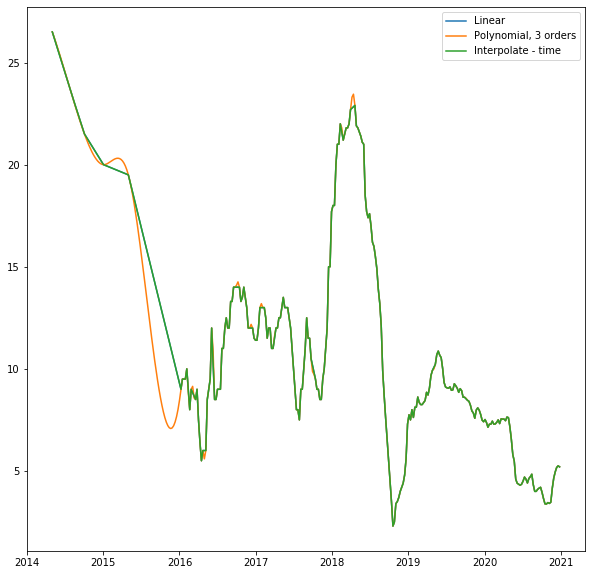

In [32]:
plt.figure(figsize=(10,10))
plt.plot(df_linear['inv_bond'],label='Linear')
plt.plot(df_poly['inv_bond'],label='Polynomial, 3 orders')
plt.plot(df_time['inv_bond'],label='Interpolate - time')
plt.legend()
plt.show()

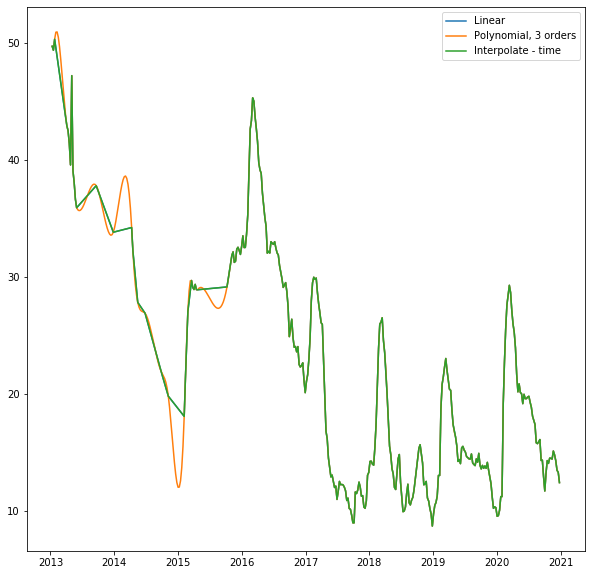

In [33]:
plt.figure(figsize=(10,10))
plt.plot(df_linear['inv_sgt'],label='Linear')
plt.plot(df_poly['inv_sgt'],label='Polynomial, 3 orders')
plt.plot(df_time['inv_sgt'],label='Interpolate - time')
plt.legend()
plt.show()

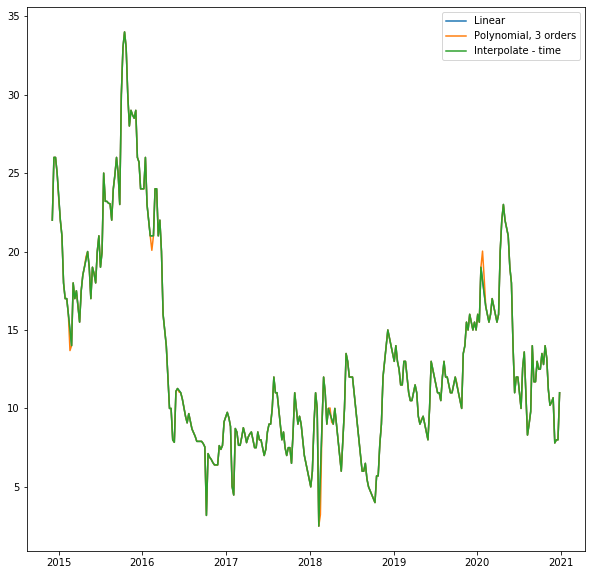

In [34]:
plt.figure(figsize=(10,10))
plt.plot(df_linear['inv_tot'],label='Linear')
plt.plot(df_poly['inv_tot'],label='Polynomial, 3 orders')
plt.plot(df_time['inv_tot'],label='Interpolate - time')
plt.legend()
plt.show()

Check visual correlation against price

Inv_bond/spread +ve correlated

treatment/inv_sgt/inv_tot/shfe inve -ve correlated



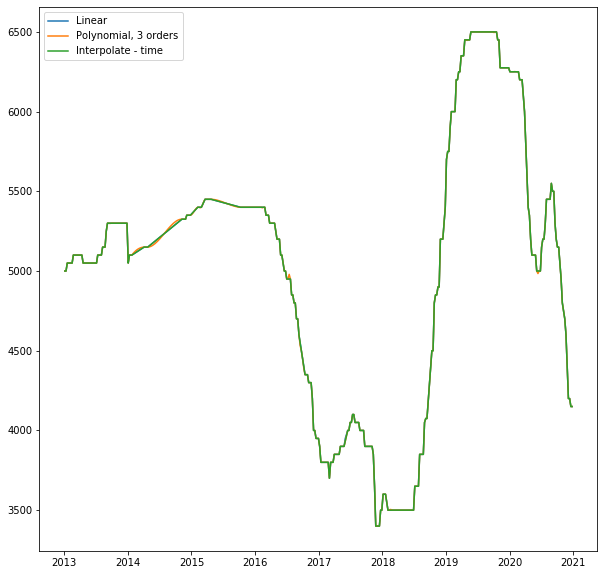

In [35]:
plt.figure(figsize=(10,10))
plt.plot(df_linear['treatment'],label='Linear')
plt.plot(df_poly['treatment'],label='Polynomial, 3 orders')
plt.plot(df_time['treatment'],label='Interpolate - time')
plt.legend()
plt.show()

polynomial with 3 orders seems more appropriate 

Pretty much identical

In [36]:
df['inv_bond'] = df_poly['inv_bond']
df['inv_sgt'] = df_poly['inv_sgt']
df['inv_tot'] = df_poly['inv_tot']
df['treatment'] = df_poly['treatment']

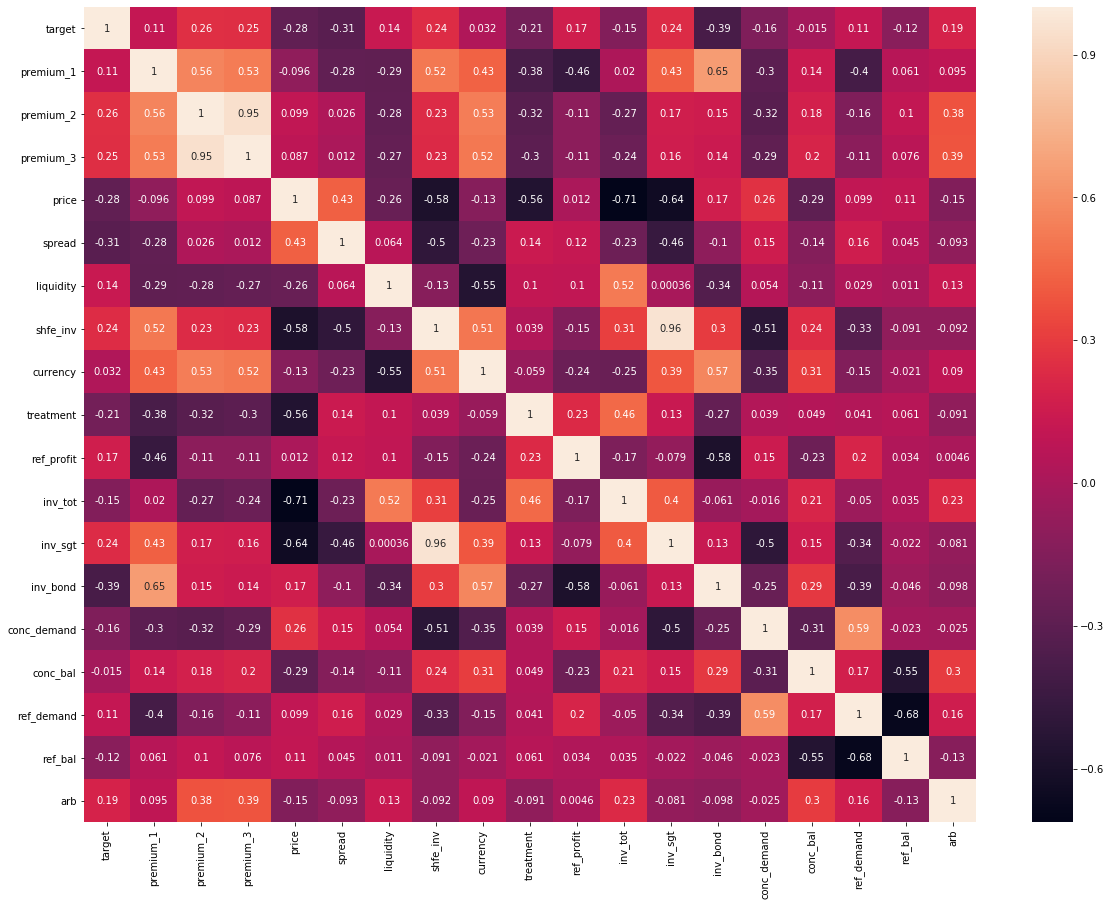

In [37]:
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

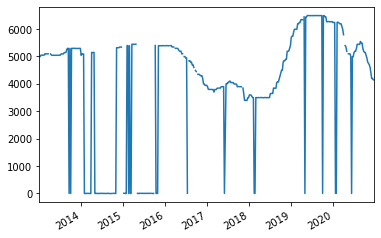

In [38]:
df['ref_profit'].plot()
#low correlation, drop this

In [39]:
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,ref_profit,inv_tot,inv_sgt,inv_bond,conc_demand,conc_bal,ref_demand,ref_bal,arb
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.000000,4991.779557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-121.433877
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.000000,4992.146661,NaN,49.730000,NaN,NaN,NaN,NaN,NaN,-98.970682
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.000000,5047.858707,NaN,49.390000,NaN,NaN,NaN,NaN,NaN,-96.063238
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.000000,5048.449222,NaN,50.330000,NaN,NaN,NaN,NaN,NaN,-153.387039
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.000000,5048.000299,NaN,50.932769,NaN,39.441124,-8.028693,36.546430,3.101009,-144.974331
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.000000,5047.858318,NaN,50.958464,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.000000,5047.858318,NaN,50.511590,NaN,39.441124,-8.028693,36.546430,3.101009,-176.094446
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.000000,5098.517815,NaN,49.696654,NaN,39.441124,-8.028693,36.546430,3.101009,-157.340790
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.000000,5091.794516,NaN,48.618159,NaN,38.679053,3.999263,54.762489,-10.125184,-115.818602
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.000000,5098.189484,NaN,47.380612,NaN,38.679053,3.999263,54.762489,-10.125184,-69.861285


In [40]:
df = df.drop(['ref_profit','inv_bond','inv_tot'],axis=1)

Forward fill for the rest 

In [41]:
df['ref_demand'] = df['ref_demand'].fillna(method='ffill')
df['conc_demand'] = df['conc_demand'].fillna(method='ffill')
df['conc_bal'] = df['conc_bal'].fillna(method='ffill')
df['ref_bal'] = df['conc_bal'].fillna(method='ffill')

In [42]:
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,inv_sgt,conc_demand,conc_bal,ref_demand,ref_bal,arb
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.000000,NaN,NaN,NaN,NaN,NaN,-121.433877
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.000000,49.730000,NaN,NaN,NaN,NaN,-98.970682
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.000000,49.390000,NaN,NaN,NaN,NaN,-96.063238
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.000000,50.330000,NaN,NaN,NaN,NaN,-153.387039
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.000000,50.932769,39.441124,-8.028693,36.546430,-8.028693,-144.974331
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.000000,50.958464,39.441124,-8.028693,36.546430,-8.028693,-176.094446
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.000000,50.511590,39.441124,-8.028693,36.546430,-8.028693,-176.094446
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.000000,49.696654,39.441124,-8.028693,36.546430,-8.028693,-157.340790
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.000000,48.618159,38.679053,3.999263,54.762489,3.999263,-115.818602
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.000000,47.380612,38.679053,3.999263,54.762489,3.999263,-69.861285


In [43]:
df.isna().sum().sort_values(ascending=False)

ref_bal        4
ref_demand     4
conc_bal       4
conc_demand    4
inv_sgt        1
arb            0
treatment      0
currency       0
shfe_inv       0
liquidity      0
spread         0
price          0
premium_3      0
premium_2      0
premium_1      0
target         0
dtype: int64

In [44]:
#backfill the reminder 
df['ref_demand'] = df['ref_demand'].fillna(method='backfill')
df['conc_demand'] = df['conc_demand'].fillna(method='backfill')
df['conc_bal'] = df['conc_bal'].fillna(method='backfill')
df['ref_bal'] = df['conc_bal'].fillna(method='backfill')

In [45]:
df.isna().sum().sort_values(ascending=False)

inv_sgt        1
arb            0
ref_bal        0
ref_demand     0
conc_bal       0
conc_demand    0
treatment      0
currency       0
shfe_inv       0
liquidity      0
spread         0
price          0
premium_3      0
premium_2      0
premium_1      0
target         0
dtype: int64

In [46]:
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,inv_sgt,conc_demand,conc_bal,ref_demand,ref_bal,arb
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.000000,NaN,39.441124,-8.028693,36.546430,-8.028693,-121.433877
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.000000,49.730000,39.441124,-8.028693,36.546430,-8.028693,-98.970682
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.000000,49.390000,39.441124,-8.028693,36.546430,-8.028693,-96.063238
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.000000,50.330000,39.441124,-8.028693,36.546430,-8.028693,-153.387039
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.000000,50.932769,39.441124,-8.028693,36.546430,-8.028693,-144.974331
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.000000,50.958464,39.441124,-8.028693,36.546430,-8.028693,-176.094446
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.000000,50.511590,39.441124,-8.028693,36.546430,-8.028693,-176.094446
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.000000,49.696654,39.441124,-8.028693,36.546430,-8.028693,-157.340790
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.000000,48.618159,38.679053,3.999263,54.762489,3.999263,-115.818602
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.000000,47.380612,38.679053,3.999263,54.762489,3.999263,-69.861285


In [47]:
df['price_diff'] = df['price'].diff()
df['price_lag_1'] = df['price'].shift(1)
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,inv_sgt,conc_demand,conc_bal,ref_demand,ref_bal,arb,price_diff,price_lag_1
2013-01-04,0,130.0,115.0,122,2031,-29.25,-1.273475,310508.0,1.3069,5000.000000,NaN,39.441124,-8.028693,36.546430,-8.028693,-121.433877,NaN,NaN
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.000000,49.730000,39.441124,-8.028693,36.546430,-8.028693,-98.970682,-26.0,2031.0
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.000000,49.390000,39.441124,-8.028693,36.546430,-8.028693,-96.063238,20.0,2005.0
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.000000,50.330000,39.441124,-8.028693,36.546430,-8.028693,-153.387039,45.0,2025.0
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.000000,50.932769,39.441124,-8.028693,36.546430,-8.028693,-144.974331,96.0,2070.0
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.000000,50.958464,39.441124,-8.028693,36.546430,-8.028693,-176.094446,29.0,2166.0
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.000000,50.511590,39.441124,-8.028693,36.546430,-8.028693,-176.094446,-30.0,2195.0
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.000000,49.696654,39.441124,-8.028693,36.546430,-8.028693,-157.340790,-87.0,2165.0
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.000000,48.618159,38.679053,3.999263,54.762489,3.999263,-115.818602,-67.0,2078.0
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.000000,47.380612,38.679053,3.999263,54.762489,3.999263,-69.861285,-45.0,2011.0


In [48]:
df =df.dropna()
df

,target,premium_1,premium_2,premium_3,price,spread,liquidity,shfe_inv,currency,treatment,inv_sgt,conc_demand,conc_bal,ref_demand,ref_bal,arb,price_diff,price_lag_1
2013-01-11,0,130.0,120.0,143,2005,-21.25,-1.106322,310178.0,1.3343,5000.000000,49.730000,39.441124,-8.028693,36.546430,-8.028693,-98.970682,-26.0,2031.0
2013-01-18,0,135.0,135.0,155,2025,-15.25,-1.048523,321148.0,1.3321,5050.000000,49.390000,39.441124,-8.028693,36.546430,-8.028693,-96.063238,20.0,2005.0
2013-01-25,0,135.0,132.5,147,2070,-11.75,-1.029588,319270.0,1.3464,5050.000000,50.330000,39.441124,-8.028693,36.546430,-8.028693,-153.387039,45.0,2025.0
2013-02-01,0,135.0,125.0,143,2166,-18.25,-1.155668,321392.0,1.3640,5050.000000,50.932769,39.441124,-8.028693,36.546430,-8.028693,-144.974331,96.0,2070.0
2013-02-08,0,135.0,130.0,151,2195,-21.25,-1.106382,317281.0,1.3365,5050.000000,50.958464,39.441124,-8.028693,36.546430,-8.028693,-176.094446,29.0,2166.0
2013-02-15,0,135.0,130.0,143,2165,-26.50,-1.184154,317281.0,1.3360,5050.000000,50.511590,39.441124,-8.028693,36.546430,-8.028693,-176.094446,-30.0,2195.0
2013-02-22,0,135.0,125.0,135,2078,-16.25,-1.041329,324032.0,1.3194,5100.000000,49.696654,39.441124,-8.028693,36.546430,-8.028693,-157.340790,-87.0,2165.0
2013-03-01,0,135.0,127.5,148,2011,-20.50,-0.950574,325521.0,1.3022,5100.000000,48.618159,38.679053,3.999263,54.762489,3.999263,-115.818602,-67.0,2078.0
2013-03-08,1,135.0,120.0,147,1966,-18.00,-0.820314,327881.0,1.3005,5100.000000,47.380612,38.679053,3.999263,54.762489,3.999263,-69.861285,-45.0,2011.0
2013-03-15,1,135.0,127.5,137,1945,-33.00,-0.740542,325890.0,1.3076,5100.000000,46.088518,38.679053,3.999263,54.762489,3.999263,-60.432468,-21.0,1966.0


In [49]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
y = df['target']
X = df.drop(['target'],axis=1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)

X_train = X.iloc[1:int(X.shape[0]*0.80),]
y_train = y.iloc[1:int(X.shape[0]*0.80),]
X_test = X.iloc[int(X.shape[0]*0.80):,]
y_test = y.iloc[int(X.shape[0]*0.80):,]

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
results = pd.DataFrame(columns = ['Accuracy','Precision','Recall','F1 Score','ROC Score'])
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def metrics(model,X_train, y_train, X_test, y_test,name):
    y_pred = model.predict(X_test)
    if np.array_equal(y_pred, y_pred.astype(bool))==False:
        fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
        y_pred = np.rint(y_pred)
    else:
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
        
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    if model =='LogReg':
        f1 = f1_score(y_test, y_pred, labels=np.unique(y_pred))
    else:
        f1 = f1_score(y_test, y_pred)
    print('Testing Accuracy:', round(acc*100,2),'%')
    print('Testing Precision:', round(prec*100,2),'%')
    print('Testing Recall:', round(recall*100,2),'%')
    print('Testing F1:', round(f1*100,2),'%')

    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(12,6))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    
    results.loc[name,['Accuracy']] = acc
    results.loc[name,['Precision']] = prec
    results.loc[name,['Recall']] = recall
    results.loc[name,['F1 Score']] = f1
    results.loc[name,['ROC Score']] = roc_auc

use simple xgb model, filter features using feature importance

[18:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing Accuracy: 63.86 %
Testing Precision: 86.36 %
Testing Recall: 41.3 %
Testing F1: 55.88 %


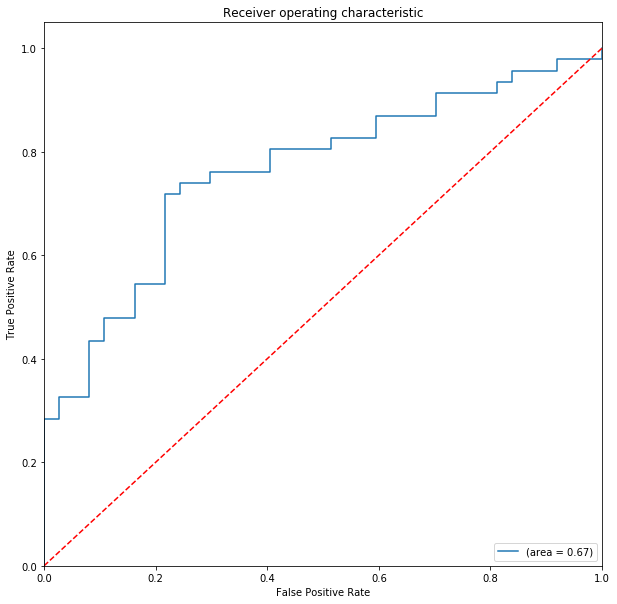

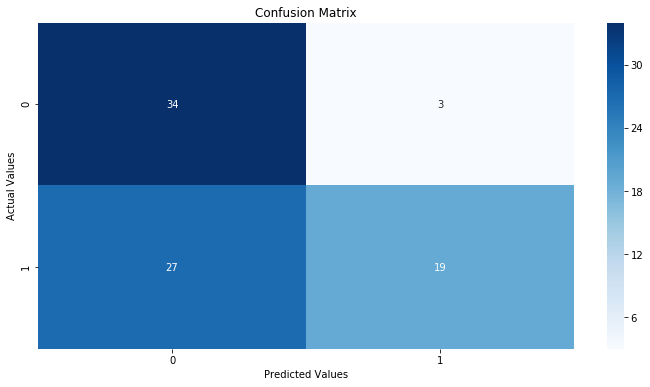

In [51]:
import xgboost as xgb
model = xgb.XGBClassifier(objective= 'binary:logistic', use_label_encoder=False)
model = model.fit(X_train,y_train)
metrics(model,X_train, y_train, X_test, y_test,'XGB')

C:\Users\Kit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Testing Accuracy: 59.04 %
Testing Precision: 83.33 %
Testing Recall: 32.61 %
Testing F1: 46.88 %


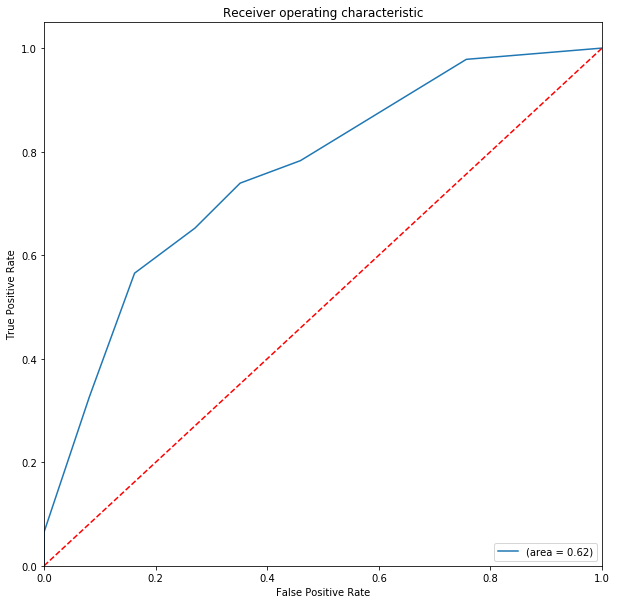

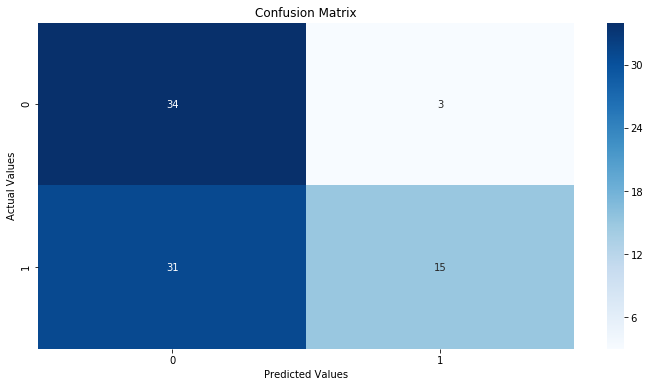

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
metrics(rf,X_train, y_train, X_test, y_test,'RF')

Epoch 1/1000
7/7 - 1s - loss: 0.6894 - accuracy: 0.5518 - val_loss: 0.6619 - val_accuracy: 0.6988 - 1s/epoch - 174ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.6766 - accuracy: 0.5793 - val_loss: 0.6619 - val_accuracy: 0.7108 - 33ms/epoch - 5ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.6666 - accuracy: 0.5915 - val_loss: 0.6612 - val_accuracy: 0.6988 - 34ms/epoch - 5ms/step
Epoch 4/1000
7/7 - 0s - loss: 0.6637 - accuracy: 0.5976 - val_loss: 0.6599 - val_accuracy: 0.6867 - 39ms/epoch - 6ms/step
Epoch 5/1000
7/7 - 0s - loss: 0.6793 - accuracy: 0.5640 - val_loss: 0.6595 - val_accuracy: 0.6747 - 48ms/epoch - 7ms/step
Epoch 6/1000
7/7 - 0s - loss: 0.6582 - accuracy: 0.6006 - val_loss: 0.6589 - val_accuracy: 0.6747 - 54ms/epoch - 8ms/step
Epoch 7/1000
7/7 - 0s - loss: 0.6592 - accuracy: 0.6098 - val_loss: 0.6574 - val_accuracy: 0.6386 - 53ms/epoch - 8ms/step
Epoch 8/1000
7/7 - 0s - loss: 0.6628 - accuracy: 0.6006 - val_loss: 0.6559 - val_accuracy: 0.6145 - 53ms/epoch - 8ms/step
Epoch 9/1000
7/7 - 0s - 

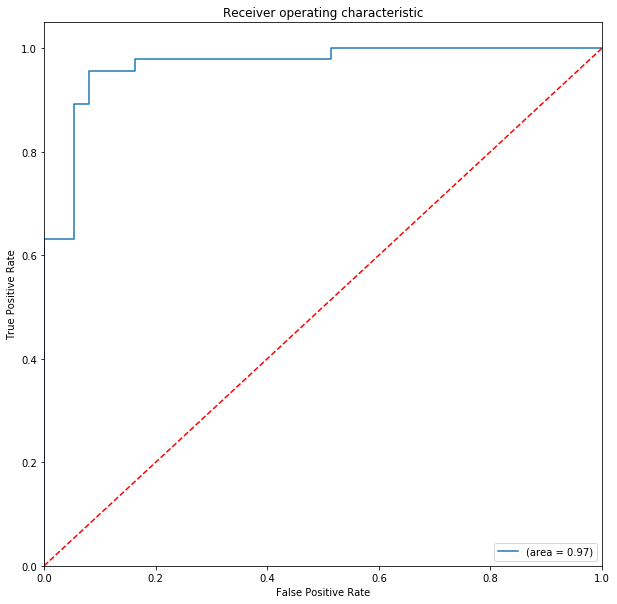

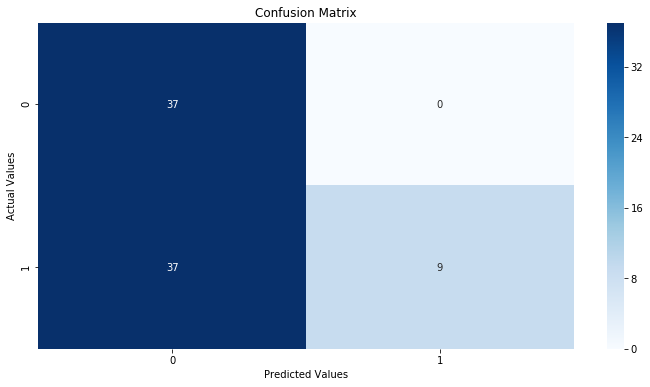

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


callback = EarlyStopping(monitor='val_loss', mode = 'min', patience=20)
model = Sequential()
model.add(Dense(12,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, batch_size=50,verbose=2,validation_data=(X_test,y_test),
         callbacks=[callback])

metrics(model,X_train, y_train, X_test, y_test,'ANN')

In [54]:
results

,Accuracy,Precision,Recall,F1 Score,ROC Score
XGB,0.638554,0.863636,0.413043,0.558824,0.665981
RF,0.590361,0.833333,0.326087,0.46875,0.622503
ANN,0.554217,1,0.195652,0.327273,0.965922


In [55]:
#Cross-validation to avoid over-fitting

In [64]:
np.arange(0,1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [70]:
from sklearn.model_selection import RandomizedSearchCV
model = xgb.XGBClassifier(objective= 'binary:logistic', use_label_encoder=False)
max_depth=[ 1,3,5,7,9]
learning_rate=[ 0.0001,0.001,0.01,0.1,0.20 ,0.3]
min_child_weight=[5,7,9,11]
base_score=[0.25,0.5,0.75]
n_estimators=[100,300,400,500]
colsample_bytree = np.arange(0,1,0.05)
objective = ['binary:logistic']
hyperparameter_grid={'colsample_bytree':colsample_bytree,'max_depth':max_depth,'learning_rate':learning_rate,'min_child_weight':min_child_weight,
                     'base_score':base_score,'n_estimators':n_estimators,'objective':objective}
#RMSE as scoring
scoring = {'Accuracy':'accuracy','F1':'f1','LogLoss':'neg_log_loss',
          'precision':'precision','recall':'recall','roc_auc':'roc_auc'}
random_cv = RandomizedSearchCV(estimator=model,param_distributions=hyperparameter_grid,cv=5, n_iter=200,
                               scoring = scoring,refit='LogLoss',n_jobs=6,verbose=5,return_train_score=True,random_state=42)
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   18.5s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   34.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   54.0s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:  2.0min finished
C:\Users\Kit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[18:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'min_child_weight': [5, 7, 9, 11],
      

In [71]:
model = random_cv.best_estimator_
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

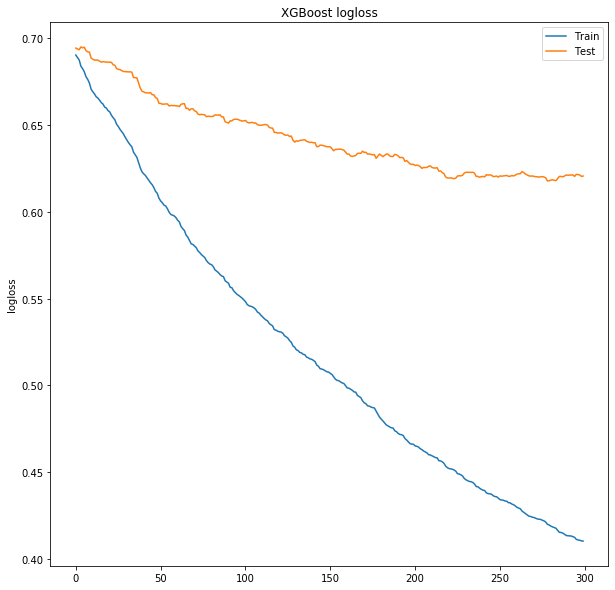

In [75]:
evals = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train,eval_set=evals,verbose=False,eval_metric='logloss')

evals_results = model.evals_result()
x_axis = range(0,len(evals_results['validation_0']['logloss']))

fig, ax = plt.subplots()
ax.plot(x_axis, evals_results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, evals_results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()

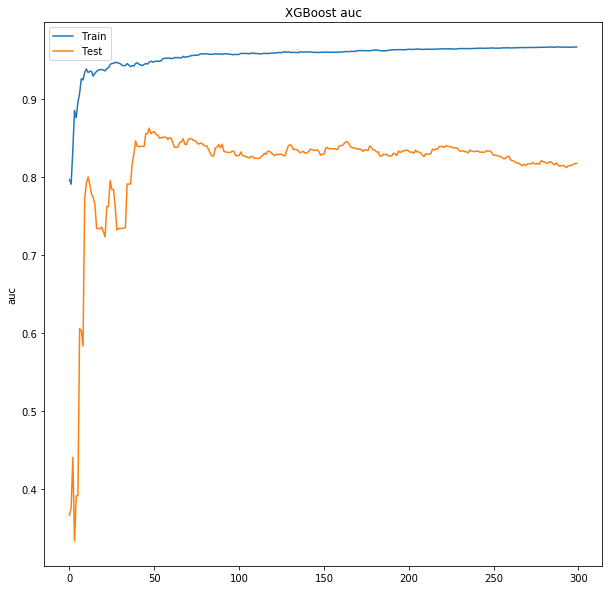

In [77]:
evals = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train,eval_set=evals,verbose=False,eval_metric='auc')

evals_results = model.evals_result()
x_axis = range(0,len(evals_results['validation_0']['auc']))

fig, ax = plt.subplots()
ax.plot(x_axis, evals_results['validation_0']['auc'], label='Train')
ax.plot(x_axis, evals_results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('auc')
plt.title('XGBoost auc')
plt.show()

Testing Accuracy: 77.11 %
Testing Precision: 84.62 %
Testing Recall: 71.74 %
Testing F1: 77.65 %


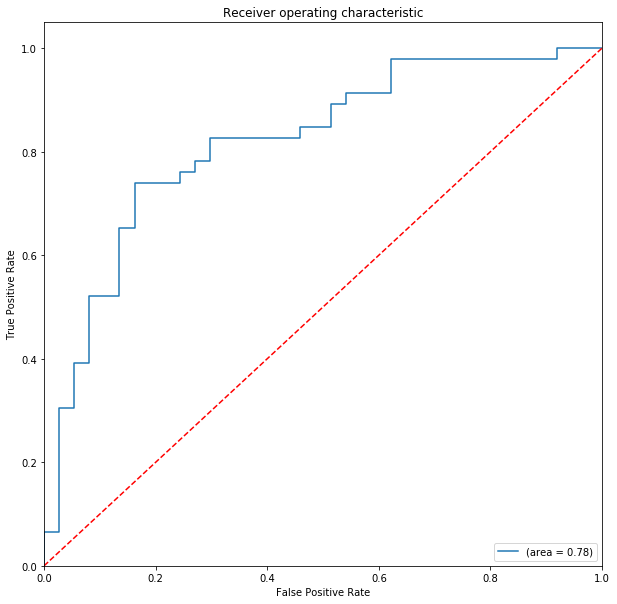

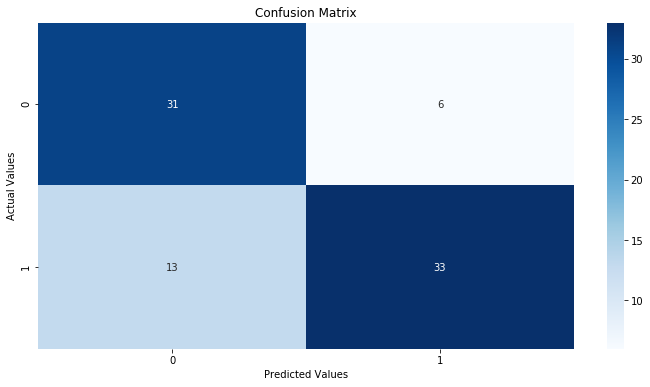

In [76]:
metrics(model,X_train, y_train, X_test, y_test,'XGB')